# Start

## Loading necessary tools

In [ ]:
pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install brainweb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Image preparation

In [ ]:
import nibabel as nib
img = nib.load('/content/phantom_1.0mm_normal_crisp.mnc')
data = img.get_fdata()


In [ ]:
img


In [ ]:
print(img)

<class 'nibabel.minc1.Minc1Image'>
data shape (181, 217, 181)
affine: 
[[   0.    0.    1.  -90.]
 [   0.    1.    0. -126.]
 [   1.    0.    0.  -72.]
 [   0.    0.    0.    1.]]
metadata:


In [ ]:
affine = img.affine

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data.shape

(181, 217, 181)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data[:, 100, :].T
# array shows 5, 6 and 0s these are the tissue labels.

array([[5., 6., 6., ..., 0., 0., 0.],
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 5., 5., ..., 0., 0., 0.],
       ...,
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 5., 6., ..., 0., 0., 0.],
       [5., 6., 6., ..., 0., 0., 0.]])

In [ ]:
from brainweb import volshow
import numpy as np


## Understanding slices and image

(217, 181)


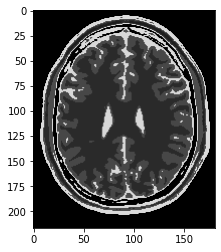

In [ ]:
# T1-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

plt.imshow(img_slice, cmap='gray_r')

msk_csf = img_slice==2 # here making a mask for different labels

plt.imshow(msk_csf)

T1_map = np.zeros(img_slice.shape)

T1_map.shape
# 0 10 np.where(a < 5, a, 1300*a)
msk_csf = np.where(img_slice == 1)
T1_map[img_slice == 0] = 0
T1_map[img_slice == 1] =2539 # slices where the image is CSF 
T1_map[img_slice == 2] = 833 # slices where the image is Grey matter
T1_map[img_slice == 3] = 500 # White Matter
T1_map[img_slice == 4] = 350 # FAT
T1_map[img_slice == 5] = 900 # muscle/skin
T1_map[img_slice == 6] = 2569 # skin
T1_map[img_slice == 7] = 0 # skull
T1_map[img_slice == 8] = 833 # glial matter
T1_map[img_slice == 9] = 500 # meat
T1_map[img_slice == 10] = 752 # MS Lesion
#T1_map[msk_csf[0][0]][msk_csf[1][0]] = 2539

print(T1_map.shape)
plt.imshow(T1_map, vmin=0, vmax=3000, cmap = "gray")


(217, 181)


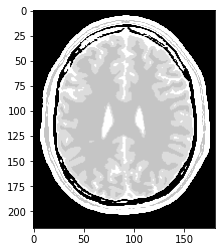

In [ ]:
# T-PD-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

plt.imshow(img_slice, cmap='gray_r')

msk_csf = img_slice==2 # here making a mask for different labels

plt.imshow(msk_csf)

T_map_pd = np.zeros(img_slice.shape)

T_map_pd.shape
# 0 10 np.where(a < 5, a, 1300*a)
msk_csf = np.where(img_slice == 1)
T_map_pd[img_slice == 0] = 0
T_map_pd[img_slice == 1] = 1 # slices where the image is CSF 
T_map_pd[img_slice == 2] = 0.86 # slices where the image is Grey matter
T_map_pd[img_slice == 3] = 0.770 # White Matter
T_map_pd[img_slice == 4] = 1 # FAT
T_map_pd[img_slice == 5] = 1 # muscle/skin
T_map_pd[img_slice == 6] = 1 # skin
T_map_pd[img_slice == 7] = 0 # skull
T_map_pd[img_slice == 8] = 0.860 # glial matter
T_map_pd[img_slice == 9] = 0.770 # meat
T_map_pd[img_slice == 10] = 0.760 # MS Lesion

print(T_map_pd.shape)
plt.imshow(T_map_pd, vmin=0, vmax=1, cmap = "gray")

In [ ]:
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 20 # echo neglect here.
params_TR = 600 # Repetition
#k*rho = PD so apply pd to formula for T1W
T1_w = np.zeros(img_slice.shape)

T1_w[img_slice == 0] = T_map_pd[img_slice == 0]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 0]))) #0
T1_w[img_slice == 1] = T_map_pd[img_slice == 1]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 1]))) #1
T1_w[img_slice == 2] = T_map_pd[img_slice == 2]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 2]))) #2

T1_w[img_slice == 3] = T_map_pd[img_slice == 3]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 3]))) #3
T1_w[img_slice == 4] = T_map_pd[img_slice == 4]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 4]))) #4
T1_w[img_slice == 5] = T_map_pd[img_slice == 5]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 5]))) #5

T1_w[img_slice == 6] = T_map_pd[img_slice == 6]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 6]))) #6
T1_w[img_slice == 7] = T_map_pd[img_slice == 7]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 7]))) #7
T1_w[img_slice == 8] = T_map_pd[img_slice == 8]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 8]))) #8

T1_w[img_slice == 9] = T_map_pd[img_slice == 9]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 9]))) #9
T1_w[img_slice == 10] = T_map_pd[img_slice == 10]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 10]))) #9

<ipython-input-14-b15c808a0d47>:16: RuntimeWarning: divide by zero encountered in true_divide
  T1_w[img_slice == 0] = T_map_pd[img_slice == 0]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 0]))) #0
<ipython-input-14-b15c808a0d47>:25: RuntimeWarning: divide by zero encountered in true_divide
  T1_w[img_slice == 7] = T_map_pd[img_slice == 7]*(1-np.exp(-(params_TR)/(T1_map[img_slice == 7]))) #7


(217, 181)


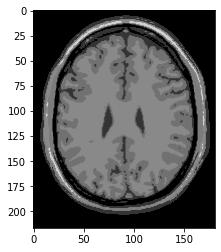

In [ ]:
print(T1_w.shape)
plt.imshow(T1_w, vmin=0, vmax=1, cmap = "gray")

(217, 181)


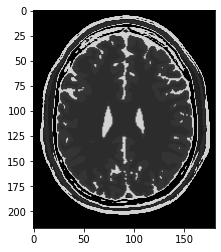

In [ ]:
# T2-mask
img_slice = np.rot90( data[100,:,:].T )
# since the image is rotated to x direction we make it to y direction.

#plt.imshow(img_slice, cmap='gray_r')

#msk_csf = img_slice==2 # here making a mask for different labels

#plt.imshow(msk_csf)

T2_map = np.zeros(img_slice.shape)

T2_map.shape
# 0 10 np.where(a < 5, a, 1300*a)
#msk_csf = np.where(img_slice == 1)
T2_map[img_slice == 0] = 0
T2_map[img_slice == 1] = 329 # slices where the image is CSF 
T2_map[img_slice == 2] = 83 # slices where the image is Grey matter
T2_map[img_slice == 3] = 70 # White Matter
T2_map[img_slice == 4] = 70 # FAT
T2_map[img_slice == 5] = 47 # muscle/skin
T2_map[img_slice == 6] = 329 # skin
T2_map[img_slice == 7] = 0 # skull
T2_map[img_slice == 8] = 83 # glial matter
T2_map[img_slice == 9] = 70 # meat
T2_map[img_slice == 10] = 237 # MS Lesion


print(T2_map.shape)
plt.imshow(T2_map, vmin=0, vmax=400, cmap = "gray")


In [ ]:
#T2-w mapping
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 80 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T1W
T2_w = np.zeros(img_slice.shape)

T2_w[img_slice == 0] = T_map_pd[img_slice == 0]*(np.exp(-(params_TE)/(T2_map[img_slice == 0]))) #0
T2_w[img_slice == 1] = T_map_pd[img_slice == 1]*(np.exp(-(params_TE)/(T2_map[img_slice == 1]))) #1
T2_w[img_slice == 2] = T_map_pd[img_slice == 2]*(np.exp(-(params_TE)/(T2_map[img_slice == 2]))) #2

T2_w[img_slice == 3] = T_map_pd[img_slice == 3]*(np.exp(-(params_TE)/(T2_map[img_slice == 3]))) #3
T2_w[img_slice == 4] = T_map_pd[img_slice == 4]*(np.exp(-(params_TE)/(T2_map[img_slice == 4]))) #4
T2_w[img_slice == 5] = T_map_pd[img_slice == 5]*(np.exp(-(params_TE)/(T2_map[img_slice == 5]))) #5

T2_w[img_slice == 6] = T_map_pd[img_slice == 6]*(np.exp(-(params_TE)/(T2_map[img_slice == 6]))) #6
T2_w[img_slice == 7] = T_map_pd[img_slice == 7]*(np.exp(-(params_TE)/(T2_map[img_slice == 7]))) #7
T2_w[img_slice == 8] = T_map_pd[img_slice == 8]*(np.exp(-(params_TE)/(T2_map[img_slice == 8]))) #8

T2_w[img_slice == 9] = T_map_pd[img_slice == 9]*(np.exp(-(params_TE)/(T2_map[img_slice == 9]))) #9
T2_w[img_slice == 10] = T_map_pd[img_slice == 10]*(np.exp(-(params_TE)/(T2_map[img_slice == 10]))) #9

<ipython-input-17-80452181fe27>:17: RuntimeWarning: divide by zero encountered in true_divide
  T2_w[img_slice == 0] = T_map_pd[img_slice == 0]*(np.exp(-(params_TE)/(T2_map[img_slice == 0]))) #0
<ipython-input-17-80452181fe27>:26: RuntimeWarning: divide by zero encountered in true_divide
  T2_w[img_slice == 7] = T_map_pd[img_slice == 7]*(np.exp(-(params_TE)/(T2_map[img_slice == 7]))) #7


(217, 181)


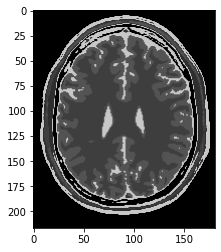

In [ ]:
print(T2_w.shape)
plt.imshow(T2_w, vmin=0, vmax=1, cmap = "gray")

In [ ]:
# Inversion recovery DIR (Double Inversion recovery) weight
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for dir-pd-weighted so in Z-dir
params_TI1 = 2208 # inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_TI2 = 545 # inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 80 # echo neglect here.
params_TR = 66700 # Repetition
#k*rho = PD so apply pd to formula for T1W
PD_dir_w = np.zeros(img_slice.shape)

for i in range(0,11,1):
  PD_dir_w[img_slice == i] = T_map_pd[img_slice == i]*(1-2*np.exp(-(params_TI2)/(T1_map[img_slice == i])) + 
                                                     2*np.exp(-(params_TI1+params_TI2)/T1_map[img_slice == i]) -
                                                     np.exp(-params_TR/T1_map[img_slice == i]))*np.exp(-params_TE/T2_map[img_slice == i]) #i
# multiplied by 10 to make the image brighter.

<ipython-input-19-2caa77cf0545>:22: RuntimeWarning: divide by zero encountered in true_divide
  PD_dir_w[img_slice == i] = T_map_pd[img_slice == i]*(1-2*np.exp(-(params_TI2)/(T1_map[img_slice == i])) +
<ipython-input-19-2caa77cf0545>:23: RuntimeWarning: divide by zero encountered in true_divide
  2*np.exp(-(params_TI1+params_TI2)/T1_map[img_slice == i]) -
<ipython-input-19-2caa77cf0545>:24: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-params_TR/T1_map[img_slice == i]))*np.exp(-params_TE/T2_map[img_slice == i]) #i


In [ ]:
np.array(PD_dir_w).shape

(217, 181)

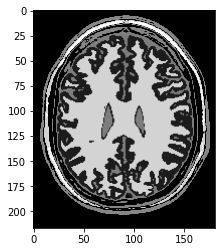

In [ ]:
plt.imshow(PD_dir_w, vmin = 0, vmax = 0.1, cmap = 'gray')

# Masks

## T1 mask

(217, 181)


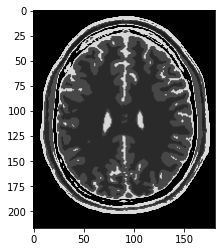

In [ ]:
# T1-mask-for-all-axial
img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
T1_map_array = []
T1_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  T1_map_zeros[img_slice_array[i] == 0] = 0 # background
  T1_map_zeros[img_slice_array[i] == 1] = 2539 # CSF
  T1_map_zeros[img_slice_array[i] == 2] = 833 # gray matter
  T1_map_zeros[img_slice_array[i] == 3] = 500 # White Matter 
  T1_map_zeros[img_slice_array[i] == 4] = 350 # FAT
  T1_map_zeros[img_slice_array[i] == 5] = 900 # muscle/skin
  T1_map_zeros[img_slice_array[i] == 6] = 2569 # skin
  T1_map_zeros[img_slice_array[i] == 7] = 0 # skull
  T1_map_zeros[img_slice_array[i] == 8] = 833 # glial matter
  T1_map_zeros[img_slice_array[i] == 9] = 500 # meat
  T1_map_zeros[img_slice_array[i] == 10] = 752 # MS lesion
  T1_map_array.append(T1_map_zeros)
  T1_map_zeros = np.zeros(img_slice.shape)


print(T1_map_array[101].shape)
plt.imshow(T1_map_array[101], vmin=0, vmax=3000, cmap = "gray")

## T2 mask

(217, 181)


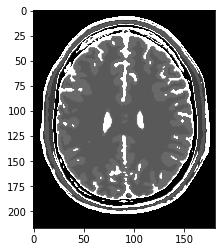

In [ ]:
# T2-mask-all-axial
#img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
T2_map_array = []
T2_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  T2_map_zeros[img_slice_array[i] == 0] = 0 # background
  T2_map_zeros[img_slice_array[i] == 1] = 329 # CSF
  T2_map_zeros[img_slice_array[i] == 2] = 83 # gray matter
  T2_map_zeros[img_slice_array[i] == 3] = 70 # White Matter 
  T2_map_zeros[img_slice_array[i] == 4] = 70 # FAT
  T2_map_zeros[img_slice_array[i] == 5] = 47 # muscle/skin
  T2_map_zeros[img_slice_array[i] == 6] = 329 # skin
  T2_map_zeros[img_slice_array[i] == 7] = 0 # skull
  T2_map_zeros[img_slice_array[i] == 8] = 83 # glial matter
  T2_map_zeros[img_slice_array[i] == 9] = 70 # meat
  T2_map_zeros[img_slice_array[i] == 10] = 237 # MS lesion
  T2_map_array.append(T2_map_zeros)
  T2_map_zeros = np.zeros(img_slice.shape)

print(T2_map_array[101].shape)
plt.imshow(T2_map_array[101], vmin=0, vmax=200, cmap = "gray") # T2 is not that bright ask what can be done to improve.

## PD mask

(217, 181)


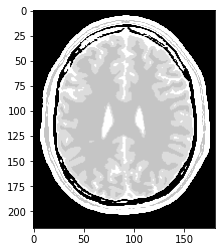

In [ ]:
# T-PD-mask-all-axial
img_slice = np.rot90( data[100,:,:].T )
img_slice_array = []
pd_map_array = []
pd_map_zeros = np.zeros(img_slice.shape)
# since the image is rotated to x direction we make it to y direction.

for i in range(len(data[:,1,1].T)):
  img_slice_array.append(np.rot90(data[i,:,:].T))

for i in range(len(img_slice_array)):
  pd_map_zeros[img_slice_array[i] == 0] = 0 # background
  pd_map_zeros[img_slice_array[i] == 1] = 1 # CSF
  pd_map_zeros[img_slice_array[i] == 2] = 0.86 # gray matter
  pd_map_zeros[img_slice_array[i] == 3] = 0.77 # White Matter 
  pd_map_zeros[img_slice_array[i] == 4] = 1 # FAT
  pd_map_zeros[img_slice_array[i] == 5] = 1 # muscle/skin
  pd_map_zeros[img_slice_array[i] == 6] = 1 # skin
  pd_map_zeros[img_slice_array[i] == 7] = 0 # skull
  pd_map_zeros[img_slice_array[i] == 8] = 0.86 # glial matter
  pd_map_zeros[img_slice_array[i] == 9] = 0.77 # meat
  pd_map_zeros[img_slice_array[i] == 10] = 0.76 # MS lesion
  pd_map_array.append(pd_map_zeros)
  pd_map_zeros = np.zeros(img_slice.shape)

print(pd_map_array[100].shape)
plt.imshow(pd_map_array[100], vmin=0, vmax=1, cmap = "gray")

## Saving files

In [ ]:
# saving masks to files.
from PIL import Image as im
import os

image_path = "/content/pd"
os.mkdir(image_path)

In [ ]:
# pd mask
for i in range(len(pd_map_array)):
  plt.imsave('/content/pd/' + "pd" + str(i) + ".png", pd_map_array[i], cmap = "gray")

In [ ]:
# t1 mask
image_path_t1 = "/content/t1"
os.mkdir(image_path_t1)

In [ ]:
for i in range(len(T1_map_array)):
  plt.imsave('/content/t1/' + "t1" + str(i)  + ".png", T1_map_array[i], cmap = "gray")

In [ ]:
# t2 mask
image_path_t2 = "/content/t2"
os.mkdir(image_path_t2)

In [ ]:
for i in range(len(T2_map_array)):
  plt.imsave('/content/t2/'+ "t2" + str(i)  + ".png", T2_map_array[i], cmap = "gray")

# Weighted image arrays

Now weighted images for all.

## T1

In [ ]:
# for all slices T1-w
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T1-weighted so in Z-dir
params_TE = 20 # echo neglect here.
params_TR = 600 # Repetition
#k*rho = PD so apply pd to formula for T1W
T1_w_array = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T1_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))

<ipython-input-31-43cc3cb37eea>:19: RuntimeWarning: divide by zero encountered in true_divide
  T1_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))


In [ ]:
maxi_t1 = 0
for i in range(len(T1_w_array)):
  if (maxi_t1 < np.max(T1_w_array[i])):
    maxi_t1 = np.max(T1_w_array[i])
  else:
    maxi_t1 = maxi_t1

In [ ]:
maxi_t1

0.8199076878520476

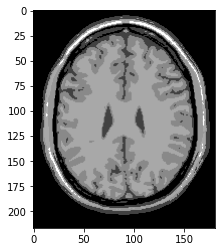

In [ ]:
plt.imshow(T1_w_array[100], vmin = 0, vmax = maxi_t1, cmap = "gray")

## T2

In [ ]:
# for all slices T2-w
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[1-exp(-TR/T1(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T2-weighted so in Z-dir
params_TE = 10 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-35-0e4b8f4028ee>:19: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# for all slices T2-w
# for T2-weighted so in Z-dir
params_TE_30 = 30 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array_30 = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array_30[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_30)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-36-ca77b83a26ed>:10: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array_30[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_30)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# for all slices T2-w
# for T2-weighted so in Z-dir
params_TE_50 = 50 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array_50 = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array_50[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_50)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-37-705e48b90e52>:10: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array_50[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_50)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# for all slices T2-w
# for T2-weighted so in Z-dir
params_TE_70 = 70 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array_70 = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array_70[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_70)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-38-262055bd0ddf>:10: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array_70[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_70)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# for all slices T2-w
# for T2-weighted so in Z-dir
params_TE_90 = 90 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array_90 = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array_90[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_90)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-39-33a18ddb95f1>:10: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array_90[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_90)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
# for all slices T2-w
# for T2-weighted so in Z-dir
params_TE_110 = 110 # echo neglect here.
params_TR = 2500 # Repetition
#k*rho = PD so apply pd to formula for T2W
T2_w_array_110 = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    T2_w_array_110[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_110)/(T2_map_array[i][img_slice_array[i] == i1])))


<ipython-input-40-6db1aef3edf8>:10: RuntimeWarning: divide by zero encountered in true_divide
  T2_w_array_110[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(np.exp(-(params_TE_110)/(T2_map_array[i][img_slice_array[i] == i1])))


In [ ]:
T2_w_array_110.shape

(181, 217, 181)

In [ ]:
T2_arrays = T2_w_array,T2_w_array_30,T2_w_array_50,T2_w_array_70,T2_w_array_90,T2_w_array_110

In [ ]:
T2_arrays = np.array(T2_arrays)

In [ ]:
np.array(T2_arrays).shape

(6, 181, 217, 181)

In [ ]:
maxi_t2 = 0
for i in range(len(T2_w_array)):
  if (maxi_t2 < np.max(T2_w_array[i])):
    maxi_t2 = np.max(T2_w_array[i])
  else:
    maxi_t2 = maxi_t2

In [ ]:
maxi_t2

0.9700621505763897

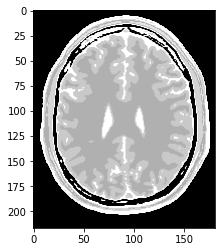

In [ ]:
plt.imshow(T2_w_array[100], vmin = 0, vmax = maxi_t2, cmap = "gray")

## DIR

In [ ]:
# Inversion recovery DIR (Double Inversion recovery) weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for dir-pd-weighted so in Z-dir
params_TI1 = 2208 # inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_TI2 = 545 # inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 80 # echo neglect here.
params_TR = 6670 # Repetition
PD_dir_w_x = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    PD_dir_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-2*np.exp(-(params_TI2)/(T1_map_array[i][img_slice_array[i] == i1])) + 
                                                     2*np.exp(-(params_TI1+params_TI2)/T1_map_array[i][img_slice_array[i] == i1]) -
                                                     np.exp(-params_TR/T1_map_array[i][img_slice_array[i] == i1]))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i

<ipython-input-48-0a22c4f50c47>:22: RuntimeWarning: divide by zero encountered in true_divide
  PD_dir_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-2*np.exp(-(params_TI2)/(T1_map_array[i][img_slice_array[i] == i1])) +
<ipython-input-48-0a22c4f50c47>:23: RuntimeWarning: divide by zero encountered in true_divide
  2*np.exp(-(params_TI1+params_TI2)/T1_map_array[i][img_slice_array[i] == i1]) -
<ipython-input-48-0a22c4f50c47>:24: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-params_TR/T1_map_array[i][img_slice_array[i] == i1]))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i


In [ ]:
# to understand what I am dealing with T1_map_array[100][img_slice_array[100] == 4]

In [ ]:
maxi = 0
for i in range(len(PD_dir_w_x)):
  if (maxi < np.max(PD_dir_w_x[i])):
    maxi = np.max(PD_dir_w_x[i])
  else:
    maxi = maxi

In [ ]:
maxi

0.18474024320946583

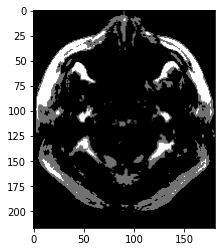

In [ ]:
plt.imshow(PD_dir_w_x[1], vmin = 0, vmax = maxi, cmap = "gray")

### Miscellaneous

In [ ]:
#PD_dir_w_x = np.zeros(np.array(img_slice_array[1]).shape)

In [ ]:
PD_dir_w_x[1].shape

(217, 181)

In [ ]:
img.shape

(181, 217, 181)

In [ ]:
np.array(pd_map_array[1]).shape

(217, 181)

In [ ]:
np.array(T2_map_array[1]).shape

(217, 181)

In [ ]:
np.array(T1_map_array[1]).shape

(217, 181)

In [ ]:
img_slice.shape

(217, 181)

In [ ]:
np.array(img_slice_array[1]).shape

(217, 181)

In [ ]:
pd_map_array[1][img_slice_array[1] == 1]

array([], dtype=float64)

In [ ]:
img_slice == 2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Flair T2w

In [ ]:
# FLuid Attenuated inversion recovery (FLAIR) T2wi weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for flair-weighted so in Z-dir
params_TI = 2075 # inversion time for time between 180 dec inv pulse to 90 pulse for T1
params_Tsat = 1400 # inv time for time between 180 dec inv pulse to 90 pulse for T2
params_TE = 80 # echo neglect here.
Flair_w_x = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    Flair_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*np.exp(-params_Tsat/T1_map_array[i][img_slice_array[i] == i1])*(1-2*np.exp(-(params_TI)/(T1_map_array[i][img_slice_array[i] == i1])))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i

<ipython-input-63-7750e1a55f4c>:21: RuntimeWarning: divide by zero encountered in true_divide
  Flair_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*np.exp(-params_Tsat/T1_map_array[i][img_slice_array[i] == i1])*(1-2*np.exp(-(params_TI)/(T1_map_array[i][img_slice_array[i] == i1])))*np.exp(-params_TE/T2_map_array[i][img_slice_array[i] == i1]) #i


In [ ]:
maxi_flair = 0
for i in range(len(Flair_w_x)):
  if (maxi_flair < np.max(Flair_w_x[i])):
    maxi_flair = np.max(Flair_w_x[i])
  else:
    maxi_flair = maxi_flair

In [ ]:
maxi_flair

0.05272807640448154

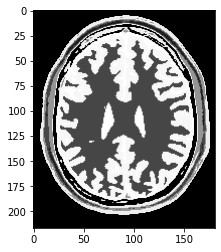

In [ ]:
plt.imshow(Flair_w_x[100], vmin = 0, vmax = maxi_flair, cmap = "gray")

## FSE T2wi

In [ ]:
# Fast Spin Echo (FSE) T2wi weight - all- slices
"""
for TE = 80ms and TR= 6670ms from Donatelli et al. given in book at 1.5 B0
TI1 = 2208 ms TI2 = 545ms
I(x,y) = Kro(x,y)[1-2exp(-TI2/T1(x,y))+2exp(-((TI1+TI2)/(T1)))- exp(-TR/T1)]*exp(-TE/T2)
at B0, rho is taken from RIT edu.. 

From Donatelli et al.
L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for FSE-weighted so in Z-dir
params_TR = 8000 
params_TE = 80 
FSE_w_x = np.zeros(img.shape)

for i in range(len(img_slice_array)):
  for i1 in range(0,11,1):
    FSE_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1]))) #i

<ipython-input-67-eef6bf5a7d43>:20: RuntimeWarning: divide by zero encountered in true_divide
  FSE_w_x[i][img_slice_array[i] == i1] = pd_map_array[i][img_slice_array[i] == i1]*(1-np.exp(-(params_TR)/(T1_map_array[i][img_slice_array[i] == i1])))*(np.exp(-(params_TE)/(T2_map_array[i][img_slice_array[i] == i1]))) #i


In [ ]:
maxi_fse = 0
for i in range(len(FSE_w_x)):
  if (maxi_fse < np.max(FSE_w_x[i])):
    maxi_fse = np.max(FSE_w_x[i])
  else:
    maxi_fse = maxi_fse

In [ ]:
maxi_fse

0.7505713355409472

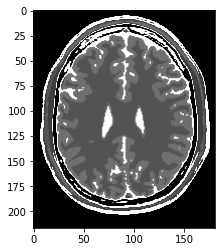

In [ ]:
plt.imshow(FSE_w_x[100], vmin = 0, vmax = maxi_fse, cmap = "gray")

## Saving files

### PNG save

In [ ]:
# saving weighted images to files.
from PIL import Image as im
import os

image_path = "/content/pd_w"
os.mkdir(image_path)

In [ ]:
# pd weighted
for i in range(len(PD_dir_w_x)):
  plt.imsave('/content/pd_w/' + "pd_w " + str(i) + ".png", PD_dir_w_x[i], cmap = "gray")

In [ ]:
image_path = "/content/T1_w"
os.mkdir(image_path)

In [ ]:
# T1 weighted
for i in range(len(T1_w_array)):
  plt.imsave('/content/T1_w/' + "T1_w " + str(i) + ".png", T1_w_array[i], cmap = "gray")

In [ ]:
image_path = "/content/T2_w"
os.mkdir(image_path)

In [ ]:
# T2 weighted
for i in range(len(T2_w_array)):
  plt.imsave('/content/T2_w/' + "T2_w " + str(i) + ".png", T2_w_array[i], cmap = "gray")

### Alternative saving better NIFTI

In [ ]:
DIR_image = nib.Nifti1Image(PD_dir_w_x, affine=np.eye(4))
T2_image_nifti = nib.Nifti1Image(T2_arrays, affine=np.eye(4))

In [ ]:
nib.save(DIR_image, os.path.join('/content/', 
'DIR.nii.gz'))
nib.save(T2_image_nifti, os.path.join('/content/','T2.nii.gz'))

In [ ]:
image_path = "/content/train"
os.mkdir(image_path)

In [ ]:
"""
for i in range(len(T2_arrays)):
  nib.save(nib.Nifti1Image(T2_arrays[i],affine = np.eye(4)), os.path.join('/content/train',f'T2_{i}.nii.gz'))
  """

"\nfor i in range(len(T2_arrays)):\n  nib.save(nib.Nifti1Image(T2_arrays[i],affine = np.eye(4)), os.path.join('/content/train',f'T2_{i}.nii.gz'))\n  "

In [ ]:
for i in range(2,3):
  nib.save(nib.Nifti1Image(T2_arrays[i],affine = np.eye(4)), os.path.join('/content/train',f'T2_{i}.nii.gz'))

In [ ]:
for i in range(1):
  nib.save(nib.Nifti1Image(Flair_w_x,affine = np.eye(4)), os.path.join('/content/train',f'Flair_{i}.nii.gz'))

In [ ]:
for i in range(1):
  nib.save(nib.Nifti1Image(FSE_w_x,affine = np.eye(4)), os.path.join('/content/train',f'fse_{i}.nii.gz'))

In [ ]:
DIR_image_x = nib.load('/content/DIR.nii.gz')

In [ ]:
T2_image_x = nib.load('/content/T2.nii.gz')

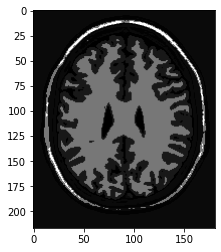

In [ ]:
plt.imshow(DIR_image_x.get_fdata()[100,:,:], cmap= "gray")

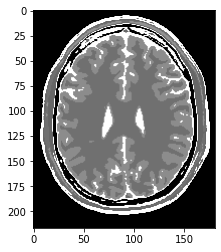

In [ ]:
plt.imshow(T2_image_x.get_fdata()[2,100,:,:], cmap = "gray") # 10 to 110 TE ms.

### Zipping and downloading to PC

In [ ]:
!zip -r /content/T2_w.zip /content/T2_w
!zip -r /content/pd_w.zip /content/pd_w
!zip -r /content/T1_w.zip /content/T1_w

  adding: content/T2_w/ (stored 0%)
  adding: content/T2_w/T2_w 14.png (stored 0%)
  adding: content/T2_w/T2_w 153.png (deflated 7%)
  adding: content/T2_w/T2_w 116.png (deflated 1%)
  adding: content/T2_w/T2_w 134.png (deflated 2%)
  adding: content/T2_w/T2_w 110.png (deflated 1%)
  adding: content/T2_w/T2_w 23.png (stored 0%)
  adding: content/T2_w/T2_w 36.png (stored 0%)
  adding: content/T2_w/T2_w 13.png (stored 0%)
  adding: content/T2_w/T2_w 149.png (deflated 5%)
  adding: content/T2_w/T2_w 30.png (stored 0%)
  adding: content/T2_w/T2_w 157.png (deflated 9%)
  adding: content/T2_w/T2_w 28.png (stored 0%)
  adding: content/T2_w/T2_w 95.png (deflated 0%)
  adding: content/T2_w/T2_w 26.png (stored 0%)
  adding: content/T2_w/T2_w 168.png (deflated 16%)
  adding: content/T2_w/T2_w 125.png (deflated 2%)
  adding: content/T2_w/T2_w 85.png (stored 0%)
  adding: content/T2_w/T2_w 99.png (deflated 0%)
  adding: content/T2_w/T2_w 54.png (stored 0%)
  adding: content/T2_w/T2_w 49.png (stored

In [ ]:
from google.colab import files

files.download('/content/T2_w.zip')
files.download('/content/pd_w.zip')
files.download('/content/T1_w.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Below part is just extra that I tried for to understand more.

# END

## find how to find vmax and vmin of an image.

# Now ML Part

do not forget to call weighted arrays.

In [ ]:
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation
from scipy.ndimage import zoom
from keras import layers

## review this part.

In [ ]:
"""
No need for now 

def load_training_data(file_paths, voxel_size):
    X_train = []
    y_train = []

    for file_path in file_paths:
        # Load the NIfTI file
        img = nib.load(file_path)
        data = img.get_fdata()

        # Preprocess the data and append to X_train
        preprocessed_data = preprocess_nifti(data, voxel_size)
        X_train.append(preprocessed_data)

        # Add the label to y_train
        if 'AD' in file_path:
            y_train.append(0)
        elif 'CN' in file_path:
            y_train.append(1)

    X_train = np.concatenate(X_train, axis=1)
    y_train = np.array(y_train)

    return X_train, y_train
"""

In [ ]:
"""
# Define preprocessing function for NIfTI images
def preprocess_nifti(filepath):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, (1, 0, 2))  # transpose to match Keras' "channels_last" format
    img = img / np.max(img)  # normalize to [0, 1]
    return img[..., np.newaxis].astype(np.float32)  # add channel dimension and cast to float32
"""

In [ ]:
"""
import glob

data_dir = '/content/train'
file_paths = glob.glob(data_dir + '/*.nii.gz')
voxel_size = np.array([1.0, 1.0, 1.0, 1.0])
X_Train, y_train = load_training_data(file_paths,voxel_size)
"""

In [ ]:
data.shape

(1, 6, 181, 181, 217)

In [ ]:
"""
def load_data(data_dir):
    # Load all nifti files in the data directory
    data = []
    for file in os.listdir(data_dir):
        if file.endswith('.nii.gz'):
            img = nib.load(os.path.join(data_dir, file))
            data.append(img.get_fdata())
    
    # Split the stacked images along the first axis to get individual 2D images
    data = np.split(data, data.shape[0], axis=0)

    # Preprocess each 2D image individually
    voxel_size = 1.0
    for i in range(len(data)):
        data[i], _ = preprocess_nifti(data[i][0], img.affine, voxel_size)

    # Concatenate the preprocessed images along a new axis
    data = np.stack(data, axis=-1)

    return data

"""

In [ ]:
"""
dir = '/content/train'
load_data_x = load_data(dir)
"""

In [ ]:
"""

# Load all nifti files in the data directory
data = []
data_dir = '/content/train'
for file in os.listdir(data_dir):
    if file.endswith('.nii.gz'):
        img = nib.load(os.path.join(data_dir, file))
        data.append(img.get_fdata())

# Resample data to isotropic voxel size
voxel_size = 1.0
for i in range(len(data)):
    print(f'Shape before preprocessing: {data[i].shape}')
    data[i], _ = preprocess_nifti(data[i], img.affine, voxel_size)
    print(f'Shape after preprocessing: {data[i].shape}')

"""

In [ ]:
"""
# Load NIfTI file
filename = '/content/T2.nii.gz'
dir = '/content/train'
load_data_x = load_data(dir)
nifti = preprocess_nifti(load_data_x)
# Extract image data as a numpy array
image = nifti.get_fdata()
"""

## Work this part for now.

In [ ]:

# Define preprocessing function for NIfTI images
def preprocess_nifti(data, affine, voxel_size):
    # Convert data to float32
    data = np.asarray(data, dtype=np.float32)

    # Transpose data to "channel first" format if necessary
    if data.shape[-1] > 1:
        data = np.transpose(data, (2, 0, 1))  # (6, 181, 217)

    # Resample data to isotropic voxel size
    zoom_factor = voxel_size / np.diag(affine)[:3]
    resampled_data = zoom(data, zoom_factor, order=1, mode='nearest')

    # Normalize data
    mean = np.mean(resampled_data)
    std = np.std(resampled_data)
    normalized_data = (resampled_data - mean) / std

    # Add channel dimension
    normalized_data = np.expand_dims(normalized_data, axis=-1)

    return normalized_data 



In [ ]:

# Load all 6 nifti files
X_train = []
for i in range(0,6):
    img = nib.load(f'/content/train/T2_{i}.nii.gz')
    data_2d = img.get_fdata()
    # Resample data to isotropic voxel size
    voxel_size = [1.0,1.0,1.0]
    # Preprocess 2D slice
    data_2d = preprocess_nifti(data_2d, img.affine, voxel_size)

    # Append to list of preprocessed 2D slices
    X_train.append(data_2d)

# Concatenate the list of preprocessed 2D slices into a single 3D volume
X_train = np.concatenate(X_train, axis=-1)

# Add a channel dimension
X_train = np.expand_dims(X_train, axis=0)

# Transpose data to "channel first" format
X_train = np.transpose(X_train, (0, 4, 1, 2, 3))  # (1, 6, 181, 217, 1)


In [ ]:
X_train.shape

(1, 6, 181, 181, 217)

In [ ]:
"""
def preprocess_nifti(nifti_file, voxel_size):
    # Load nifti data
    nifti = nib.load(nifti_file)
    data = nifti.get_fdata()

    # Resample data to specified voxel size
    current_voxel_size = np.array(nifti.header.get_zooms())
    zoom_factor = current_voxel_size / voxel_size
    resampled_data = zoom(data, zoom_factor, order=1, mode='nearest')

    # Normalize voxel intensities to [0, 1] range
    min_val = np.min(resampled_data)
    max_val = np.max(resampled_data)
    resampled_data = (resampled_data - min_val) / (max_val - min_val)

    # Add channel dimension to data
    resampled_data = np.expand_dims(resampled_data, axis=-1)

    return resampled_data
"""

In [ ]:

y_train = []
#X_train = np.concatenate(X_train, axis = 1)
y_train = X_train


In [ ]:

from skimage.transform import resize

# assuming your data is stored in `data`
X_train = resize(X_train, (256,256,1,1))
y_train = resize(y_train, (256,256,1,1))

In [ ]:

X_train = X_train.reshape(-1, 256, 256, 1)
y_train = y_train.reshape(-1,256,256,1)

In [ ]:
X_train.shape

(217, 256, 256, 1)

In [ ]:
# Define custom loss function
def custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0):
    # Compute L1/L2 regularization loss
    l1_loss = l1_factor * K.sum(K.abs(y_pred))
    l2_loss = l2_factor * K.sum(K.square(y_pred))

    # Apply Bloch equation to predicted maps
    # Here, we assume that the predicted maps are the first two channels of the output tensor
    # You may need to adjust this depending on the output format of your model
    if y_pred.shape[-1] == 1:
      m_xy_pred = y_pred[:,:,:,0]
    else:
      m_xy_pred = tf.math.sqrt(K.square(y_pred[:,:,:,0]) + K.square(y_pred[:,:,:,0]))
    t2_map_pred = -1.0 / K.log(tf.clip_by_value(m_xy_pred, 1e-10, 1.0))

    # Compute Bloch equation loss
    #m_xy_true = tf.math.sqrt(K.square(y_true[:, :, :, 0]) + K.square(y_true[:, :, :, 0]))
    #t2_map_true = -1.0 / K.log(tf.clip_by_value(m_xy_true, 1e-10, 1.0))
    bloch_loss = bloch_factor * K.mean(K.square(t2_map_pred - y_true[:,:,:,0]))

    # Combine losses
    total_loss = K.mean(K.abs(y_true[:, :, :, 0] - y_pred[:, :, :, 0])) + l1_loss + l2_loss + bloch_loss

    return total_loss

In [ ]:
"""
# Define function to load training data
def load_training_data(data_dir):
    X_train = []
    for filepath in os.listdir(data_dir):
        if filepath.endswith('.nii'):
            img = preprocess_nifti(os.path.join(data_dir, filepath))
            X_train.append(img)
    X_train = np.stack(X_train, axis=0)
    return X_train, X_train
"""

### don't show for now

In [ ]:
"""
input_shape = (256, 256, 1)
  input_tensor = Input(shape=input_shape)
  x = Conv2D(32, 3, padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = tf.keras.layers.UpSampling2D(size=(1, 2))(x)
  x = model.add(tf.keras.layers.Reshape((-1, 2, 2)))

  x = Conv2D(32, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(64, 3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(64, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(128, 3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(128, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(256, 3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(256, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(512, 3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(512, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(1024, 3, strides=2, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(1024, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(512, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)


  x = Conv2D(2, 1, padding='same')(x)
  output_tensor = Activation('linear')(x)

"""

## continue

In [ ]:
# Define Keras model
input_shape = (256, 256, 1)

model = tf.keras.Sequential([
  tf.keras.Input(shape=input_shape),
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),

  # Upsample to 128x128
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),


  layers.Conv2D(64, 3, strides=2, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),


  layers.Conv2D(64, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),


  layers.Conv2D(128, 3, strides=2, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),

  # Upsample to 256x256
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  layers.Conv2D(128, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),

  layers.Conv2D(1, 1, padding='same'),
  # Reshape to 256x256x1
  layers.Reshape((256, 256, 1)),
  layers.Dense(1,activation = 'linear')
])

In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 512, 512, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 512, 512, 32)     1

In [ ]:
model.compile(loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0), metrics =['mae','accuracy'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3))

In [ ]:
# Load training data
#X_train, y_train = load_training_data('/content/train')

# Train model
model.fit(X_train, y_train, batch_size=4, epochs=5)

Epoch 1/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


55/55 [==============================] - 800s 14s/step - loss: inf - mae: 4.4068 - accuracy: 0.0000e+00
Epoch 2/5
16/55 [=======>......................] - ETA: 9:17 - loss: inf - mae: 5.6627 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

## Save Keras Model

In [ ]:
model.save('my_model.h5')

NameError: ignored

## Visualize training curves

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Not for now.

In [ ]:
#T2_w_array
#T1_w_array
#PD_dir_w_x
# T2_image_x.get_fdata()

T2_data = T2_image_x.get_fdata()

In [ ]:
T2_data.shape

(6, 181, 217, 181)

In [ ]:
import tensorflow as tf
from keras import backend as K

# Define custom loss function
def custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, t2_factor=1.0):
    # Compute L1/L2 regularization loss
    l1_loss = l1_factor * K.sum(K.abs(y_pred))
    l2_loss = l2_factor * K.sum(K.square(y_pred))

    # Compute T2 mapping loss
    # Here, we assume that the predicted T2 map is the second channel of the output tensor
    # You may need to adjust this depending on the output format of your model
    t2_map = y_pred[:, :, :, 1]
    t2_true = y_true[:, :, :, 1]
    t2_loss = t2_factor * K.mean(K.square(t2_map - t2_true))

    # Combine losses
    total_loss = K.mean(K.abs(y_true - y_pred)) + l1_loss + l2_loss + t2_loss

    return total_loss

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D

# Define Keras model
input_shape = (256, 256, 1)
input_tensor = Input(shape=input_shape)
x = Conv2D(64, 3, activation='relu')(input_tensor)
output_tensor = Conv2D(2, 1, activation='linear')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile model with custom loss function
model.compile(optimizer='adam', loss=custom_loss)

In [ ]:
tf.config.run_functions_eagerly(False)

In [ ]:
batch_size = 5
epochs = 20

In [ ]:
#model.fit(x_train, steps_per_epoch=1319//batch_size, epochs=epochs, validation_data=x_test, validation_steps=145//batch_size)

# New Model

## preprocessing

In [ ]:
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation
from scipy.ndimage import zoom
from keras import layers
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data, img.header.get_zooms()[:3]  # Return the voxel size as well

In [ ]:
def preprocess_nifti(data, voxel_size):
    # Normalize data to range [0, 1]
    data = (data - np.min(data)) / (np.max(data) - np.min(data))

    # Resize data to desired voxel size
    new_shape = np.round(np.array(data.shape) * np.array(voxel_size) / np.array(voxel_size)).astype(int)  # Use the specified voxel size
    preprocessed_data = resize(data, new_shape, anti_aliasing=True)

    return preprocessed_data

In [ ]:
def load_training_data(file_paths, voxel_size):
    images = []
    for file_path in file_paths:
        data, _ = load_nifti(file_path)
        preprocessed_data = preprocess_nifti(data, voxel_size)
        images.append(preprocessed_data)

    # Concatenate images along the last axis to create a single tensor
    input_tensor = np.stack(images, axis=-1)

    return input_tensor, input_tensor

## Load data

In [ ]:
import glob

file_paths = glob.glob('/content/train/*.nii.gz')
X_train, y_train = load_training_data(file_paths, voxel_size=[1.0, 1.0, 1.0])

In [ ]:
np.array(X_train).shape # 181,217,181,3

(181, 217, 181, 3)

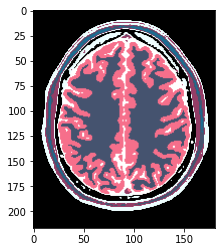

In [ ]:
plt.imshow(X_train[110],cmap="gray")

In [ ]:
np.max(X_train)

1.0

In [ ]:
np.min(X_train)

0.0

In [ ]:
np.isnan(X_train).any()

False

In [ ]:
#pd_map_array
#T2_map_array
#T1_map_array

# Stack the arrays along the last axis to create a 4D array
prep_T1_map_array = preprocess_nifti(T1_map_array, voxel_size=[1.0,1.0,1.0])
prep_T2_map_array = preprocess_nifti(T2_map_array, voxel_size=[1.0,1.0,1.0])
prep_pd_map_array = preprocess_nifti(pd_map_array, voxel_size=[1.0,1.0,1.0])
X_test = np.stack((prep_T1_map_array, prep_T2_map_array, prep_pd_map_array), axis=-1)

# The resulting array has shape (181, 217, 181, 3)
print(X_test.shape)

(181, 217, 181, 3)


## custom loss

In [ ]:
def custom_loss(y_true, y_pred, l1_weight=0.01, l2_weight=0.01, Tsat=1950, TI=145, TR=1200, TE=50, epsilon=1e-8):
    # Extract T1, T2, and PD maps from y_pred
    T1_pred, T2_pred, PD_pred = y_pred[:, :, :, 0], y_pred[:, :, :, 1], y_pred[:, :, :, 2]

    # Define the three Bloch equations with epsilon added to avoid zero division errors
    Img1 = PD_pred * (1 - K.exp(-TR / (T1_pred + epsilon)))
    Img2 = PD_pred * (1 - K.exp(-TR / (T1_pred + epsilon)) * K.exp(-TE / (T2_pred + epsilon)))
    Img3 = PD_pred * K.exp(-Tsat / (T1_pred + epsilon)) * (1 - 2 * K.exp(-TI / (T1_pred + epsilon))) * K.exp(-TE / (T2_pred + epsilon))

    # Compute the mean squared error between the predicted and true images
    loss = K.mean(K.square(Img1 - y_true[:, :, :, 0]) + K.square(Img2 - y_true[:, :, :, 1]) + K.square(Img3 - y_true[:, :, :, 2]))
    
    # Compute L1 and L2 regularization penalties
    l1_penalty = K.sum(K.abs(loss))
    l2_penalty = K.sum(K.square(loss))

    # Add the regularization penalties to the loss
    loss += l1_weight * l1_penalty + l2_weight * l2_penalty

    return loss

## sequential model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Define Keras model
input_shape = (217, 181 ,3)

model = tf.keras.Sequential([
  tf.keras.Input(shape=input_shape),
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Activation('softmax'),

  # Upsample to 128x128
  #tf.keras.layers.UpSampling2D(size=(2, 2)),
  layers.Conv2D(32, 3, padding='same'),
  layers.BatchNormalization(),
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Activation('softmax'),


  layers.Conv2D(64, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Activation('relu'),


  layers.Conv2D(64, 3, padding='same'),
  layers.BatchNormalization(),  
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Activation('softmax'),


  layers.Conv2D(128, 3, strides=1, padding='same'),
  layers.BatchNormalization(),
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Activation('relu'),

  #tf.keras.layers.UpSampling2D(size=(2, 2)),
  layers.Conv2D(128, 3, padding='same'),
  layers.BatchNormalization(),
  #tf.keras.layers.LeakyReLU(alpha=0.1),
  layers.Dropout(0.5),

  layers.Conv2D(3, 1, padding='same'),
  layers.Activation('softmax'),
  #layers.Cropping2D(cropping=((1, 0), (1, 0)), data_format=None)
  #Reshape to 181x217x181x3
])

model.build(input_shape)

In [ ]:
model.summary()

## Extra model

In [ ]:
img_size = (217,181)
num_classes = 3

def get_model(img_size, num_classes):
    inputs = tf.keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("softmax")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("softmax")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("softmax")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("softmax")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("softmax")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    outputs = layers.Cropping2D(cropping=((7, 0), (11, 0)), data_format=None)(outputs)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 217, 181, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 91, 32)  896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 109, 91, 32)  128        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

## Model Compile

In [ ]:
model.compile(loss=custom_loss, metrics =['accuracy'], optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3,name="Adam", clipvalue = 1))

## Plot the Model Architecture

In [ ]:
from keras.utils import plot_model

In [ ]:
ifile = 'model.jpg'
tf.keras.utils.plot_model (model, to_file = ifile, show_shapes = True, show_layer_names = True)

## Model fit

In [ ]:
# Train model
history = model.fit(X_train, y_train, batch_size=3, epochs=100)

Epoch 1/100
61/61 [==============================] - 126s 2s/step - loss: 0.3518 - accuracy: 0.5444
Epoch 2/100
61/61 [==============================] - 101s 2s/step - loss: 0.2876 - accuracy: 0.5523
Epoch 3/100
61/61 [==============================] - 101s 2s/step - loss: 0.2743 - accuracy: 0.5463
Epoch 4/100
61/61 [==============================] - 101s 2s/step - loss: 0.2722 - accuracy: 0.5469
Epoch 5/100
61/61 [==============================] - 101s 2s/step - loss: 0.2721 - accuracy: 0.5492
Epoch 6/100
61/61 [==============================] - 101s 2s/step - loss: 0.2708 - accuracy: 0.5535
Epoch 7/100
61/61 [==============================] - 101s 2s/step - loss: 0.2698 - accuracy: 0.5615
Epoch 8/100
61/61 [==============================] - 101s 2s/step - loss: 0.2700 - accuracy: 0.5644
Epoch 9/100
61/61 [==============================] - 101s 2s/step - loss: 0.2711 - accuracy: 0.5605
Epoch 10/100
61/61 [==============================] - 100s 2s/step - loss: 0.2702 - accuracy: 0.5678

## Save keras model

In [ ]:
model.save('my_model.h5')

## Visualize training curve

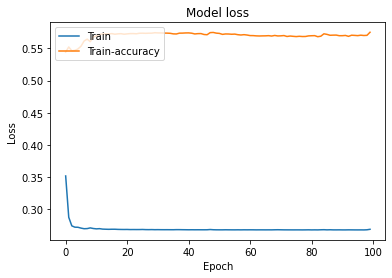

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Train-accuracy'], loc='upper left')
plt.show()

## Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
loss, accuracy = model.evaluate(X_train, X_test)

6/6 [==============================] - 26s 4s/step - loss: 0.5160 - accuracy: 0.5994


In [ ]:
print('Evaluation loss:', loss)
print('Evaluation accuracy:', accuracy)

Evaluation loss: 0.5159635543823242
Evaluation accuracy: 0.5994014739990234


In [ ]:
predictions = model.predict(X_train)

6/6 [==============================] - 24s 4s/step


## Model images Evaluations, Predictions

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the learned weights from an h5 file
weights = model.load_weights('my_model.h5')

# Extract the learned features from a specific layer
layer_name = 'conv2d_6'
layer = model.get_layer(layer_name)
learned_features = layer.output

In [ ]:
# Load the learned features from an h5 file
model = tf.keras.models.load_model('my_model.h5',custom_objects={'custom_loss': custom_loss})
learned_features = model.get_layer(layer_name).output


In [ ]:
# Load your test data (inputs and true labels)

y_true = X_test

In [ ]:
y_true_plot = y_true

In [ ]:
# Use the model to make predictions
predict = model.predict(X_test)

6/6 [==============================] - 25s 4s/step


In [ ]:
predict.shape

(181, 217, 181, 3)

In [ ]:
plot_pre = predict

In [ ]:
plot_predict = plot_pre

In [ ]:
# Apply thresholding to set low values to zero
threshold = 1e-8  # set your threshold here
for i in range(0,3):
  if (i == 0):
    plot_predict[plot_predict < 0.5 *threshold] = 0
    plot_predict[(plot_predict > 3*threshold) & (plot_predict < 3000000*threshold)] = 100*plot_predict[(plot_predict > 3*threshold) & (plot_predict < 3000000*threshold)] 
    plot_predict[plot_predict >= 9.91909444e-01] = 0
  elif (i == 1):
    plot_predict[plot_predict < 2 * threshold] = 0
  else:
    plot_predict[plot_predict < 3 * threshold] = 0

In [ ]:
# assuming y_true and y_pred have shape (181, 217, 181, N)
y_true = np.moveaxis(y_true, -1, 0)  # move the last axis to the first position
predict = np.moveaxis(predict, -1, 0)

# now y_true and y_pred have shape (N, 181, 217, 181)

In [ ]:
# Assuming y_true and y_pred are numpy arrays of shape (N, 181, 217, 181)
mse = np.mean((y_true - predict)**2)
psnr = 20 * np.log10(255) - 10 * np.log10(mse)

In [ ]:
mse

0.3262626822828498

In [ ]:
psnr

52.995129585647625

In [ ]:
from skimage.metrics import structural_similarity as ssim

# Assuming y_true and y_pred are numpy arrays of shape (N, 181, 217, 181)
ssim_score = np.mean([ssim(y_true[i], predict[i], multichannel=True) for i in range(len(y_true))])

<ipython-input-698-a944d720c359>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = np.mean([ssim(y_true[i], predict[i], multichannel=True) for i in range(len(y_true))])
/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
ssim_score

0.29615966256472004

In [ ]:
from sklearn.metrics import mean_squared_error

# assuming y_true and y_pred have shape (N, 181, 217, 181)
y_true_flat = y_true.flatten()
y_pred_flat = predict.flatten()
# compute the accuracy score for each sample


# assuming y_true and y_pred have shape (N, 181, 217, 181)
mse_x = mean_squared_error(y_true_flat, y_pred_flat)


print(f"Mean Squared Error: {mse_x}")

Mean Squared Error: 0.32626268228284544


## Predict maps

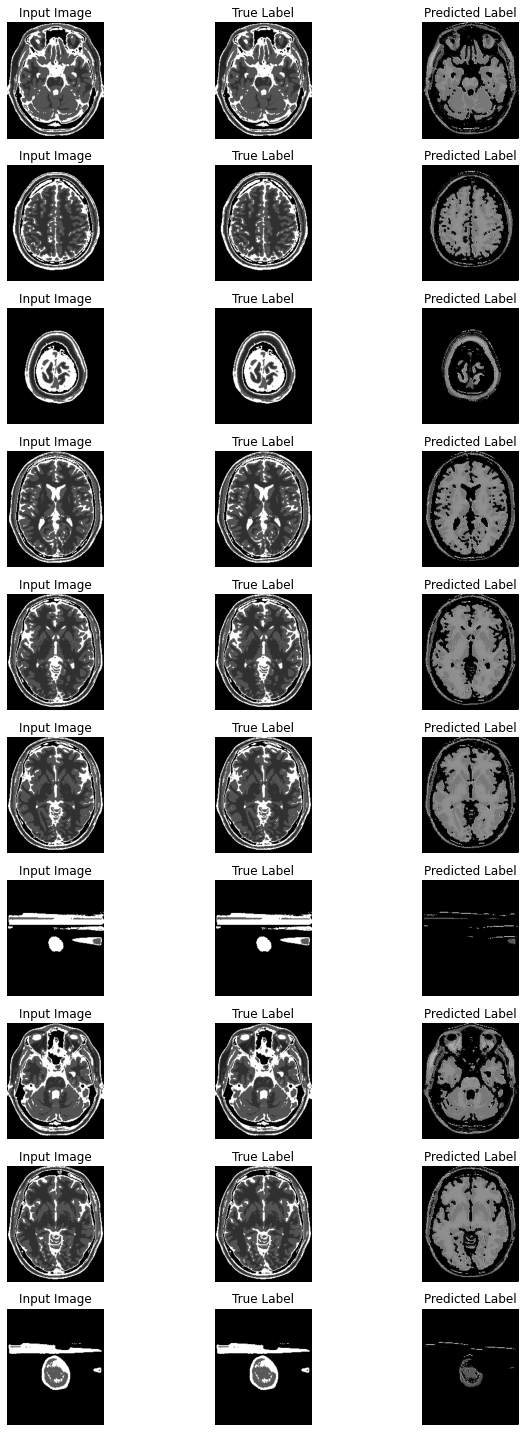

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 10  # number of samples to visualize
indices = np.random.choice(range(len(X_test)), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
for i, idx in enumerate(indices):
    axes[i][0].imshow(X_test[idx,:,:,0], cmap='gray')
    axes[i][0].axis('off')
    axes[i][0].set_title("Input Image")
    axes[i][1].imshow(y_true_plot[idx,:,:,0], cmap='gray')
    axes[i][1].axis('off')
    axes[i][1].set_title("True Label")
    axes[i][2].imshow(plot_predict[idx,:,:,0], cmap='gray')
    axes[i][2].axis('off')
    axes[i][2].set_title("Predicted Label")

plt.tight_layout()
plt.show()

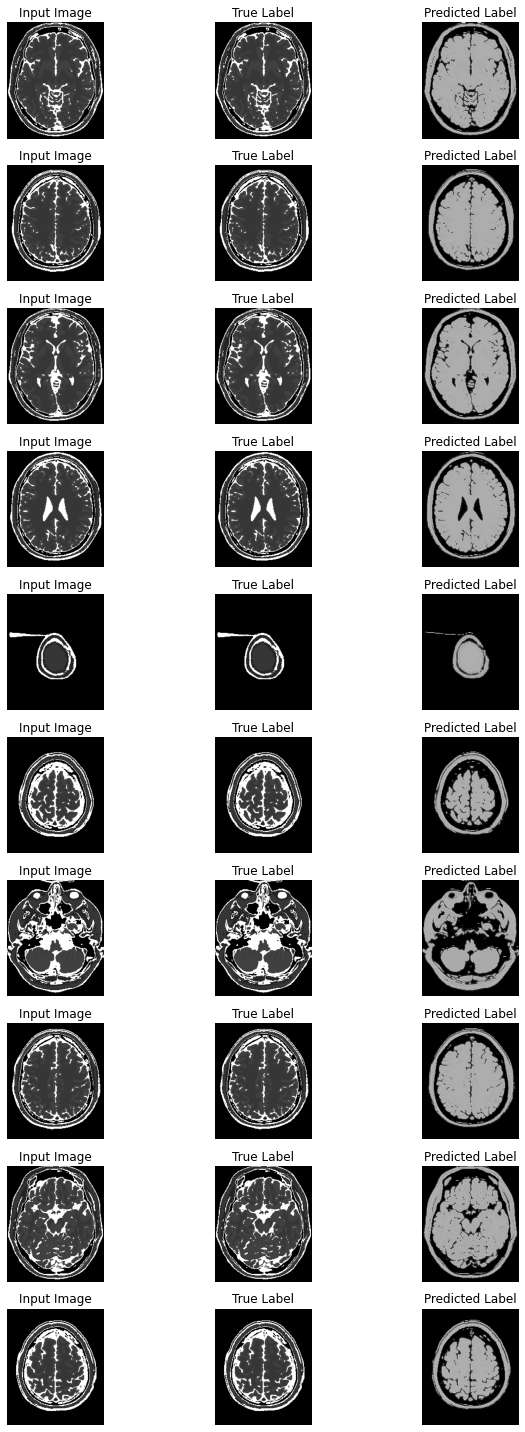

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 10  # number of samples to visualize
indices = np.random.choice(range(len(X_test)), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
for i, idx in enumerate(indices):
    axes[i][0].imshow(X_test[idx,:,:,1], cmap='gray')
    axes[i][0].axis('off')
    axes[i][0].set_title("Input Image")
    axes[i][1].imshow(y_true_plot[idx,:,:,1], cmap='gray')
    axes[i][1].axis('off')
    axes[i][1].set_title("True Label")
    axes[i][2].imshow(plot_predict[idx,:,:,1], cmap='gray')
    axes[i][2].axis('off')
    axes[i][2].set_title("Predicted Label")

plt.tight_layout()
plt.show()

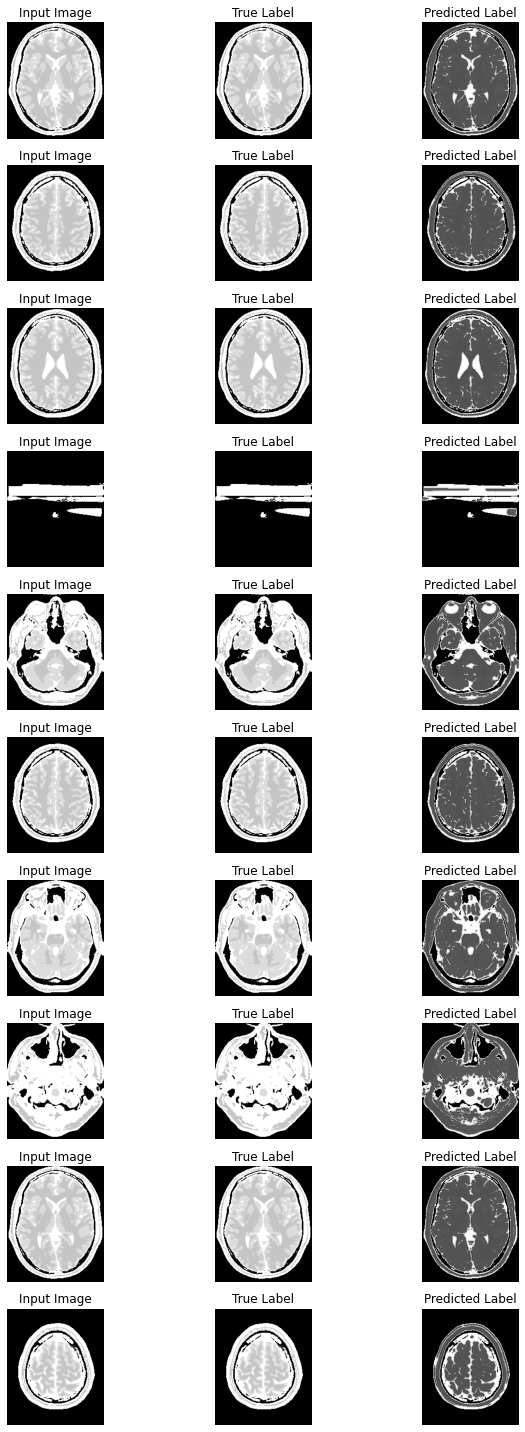

In [ ]:
# Visualize some of the input images alongside their true and predicted labels
n_samples = 10  # number of samples to visualize
indices = np.random.choice(range(len(X_test)), n_samples, replace=False)

fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(10, 20))
for i, idx in enumerate(indices):
    axes[i][0].imshow(X_test[idx,:,:,2], cmap='gray')
    axes[i][0].axis('off')
    axes[i][0].set_title("Input Image")
    axes[i][1].imshow(y_true_plot[idx,:,:,2], cmap='gray')
    axes[i][1].axis('off')
    axes[i][1].set_title("True Label")
    axes[i][2].imshow(plot_predict[idx,:,:,2], cmap='gray')
    axes[i][2].axis('off')
    axes[i][2].set_title("Predicted Label")

plt.tight_layout()
plt.show()

## Close to system

In [ ]:
tf.keras.backend.clear_session()

# Exercise finished.

In [ ]:
"""
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Define image preprocessing function
def preprocess_image(image):
    # Normalize pixel intensities to [0, 1]
    image = image.astype(np.float32) / 255.0
    
    # Resize image to desired shape
    image = tf.image.resize(image, (256, 256))
    
    return image

# Load MRI dataset
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
train_generator = train_datagen.flow_from_directory(
    '/content/',
    target_size=(256, 256),
    batch_size=32,
    class_mode=None)

# Preprocess images in batches
for images_batch in train_generator:
    preprocessed_images = np.array([preprocess_image(image) for image in images_batch])
    # Use preprocessed_images for training
    ...

"""    

In [ ]:
plt.imshow(data[:, :, 90].T, cmap = 'gray_r')

ValueError: 'Greys_s' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', '...


ValueError: 'Greys_s' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', '...


In [ ]:
%matplotlib inline
img

In [ ]:
nib.minc2.Minc2Image(img, img.affine, header=None, extra=None, file_map=None)

In [ ]:
inv_rec_2 = (data[100,:,:].T)*params_PD[2]*(1-np.exp(-(params_TR)/(params_T1[2]))) #2


In [ ]:
plt.imshow(data[100,:,:].T, cmap = 'gray_r')

In [ ]:
plt.imshow(inv_rec_2, cmap = 'gray_r')

In [ ]:
inv_rec_GM.mean()

In [ ]:
(data[36,:,:].T).mean()

In [ ]:
nib.save(nib.minc1.Minc1Image(inv_rec_GM, img.affine, header = None, extra= None, file_map="image"), 'inv_rec_GM.nii')

In [ ]:
nib.save(nib.minc1.Minc1Image(inv_rec_GM, img.affine, header = None, extra= None, file_map="image"), 'inv_rec_GM.mnc') # does not work ?

In [ ]:
plt.imshow(inv_rec_CSF, cmap = 'gray_r')

In [ ]:
plt.imshow(data[18, :, :].T, cmap = 'gray_r')

In [ ]:
"""
for TE = 20ms and TR= 600ms typical given in book at 1.5 B0
I(x,y) = Kro(x,y)[exp(-TE/T2(x,y))]
at B0, rho is taken from RIT edu.. 

L.M. Fletcher, J.B. Barsotti, J.P. Hornak
"A Multispectral Analysis of Brain Tissues."
Magn. Reson. Med. 29:623-630 (1993).
"""
# for T2-weighted so in Z-dir
params_TE = 0.08 # echo time.
params_TR = 2.5 # Repetition neglect here
params_T2 = [0,0.329,0.083,0.07,0.07,0.047,0.329,0,0.083,0.07,0.237]
#k*rho = PD so apply pd to formula for T2W

params_PD = [0,1,0.86,0.77,1,1,1,0,0.86,0.77,0.76]

inv_rec_CSF_t2 = (data[:,:,18].T)*params_PD[1]*(np.exp(-(params_TE)/(params_T2[1]))) #1
inv_rec_GM_t2 = (data[:,:,36].T)*params_PD[2]*(np.exp(-(params_TE)/(params_T2[2]))) #2

In [ ]:
plt.imshow(inv_rec_GM_t2, cmap = 'gray_r')

In [ ]:
inv_rec_GM_t2.mean()
# image weights change but what happens I do not know.

In [ ]:
(data[:,:,36].T).mean()

In [ ]:
plt.imshow(data[:,:,36].T, cmap = 'gray_r')

In [ ]:

"""
Sample code


import os
import numpy as np
import nibabel as nib
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation

# Define preprocessing function for NIfTI images
def preprocess_nifti(filepath):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, (1, 0, 2))  # transpose to match Keras' "channels_last" format
    img = img / np.max(img)  # normalize to [0, 1]
    return img[..., np.newaxis].astype(np.float32)  # add channel dimension and cast to float32

# Define custom loss function
def custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0):
    # Compute L1/L2 regularization loss
    l1_loss = l1_factor * K.sum(K.abs(y_pred))
    l2_loss = l2_factor * K.sum(K.square(y_pred))

    # Apply Bloch equation to predicted maps
    # Here, we assume that the predicted maps are the first two channels of the output tensor
    # You may need to adjust this depending on the output format of your model
    m_xy_pred = tf.math.sqrt(K.square(y_pred[:, :, :, 0]) + K.square(y_pred[:, :, :, 1]))
    t2_map_pred = -1.0 / K.log(tf.clip_by_value(m_xy_pred, 1e-10, 1.0))

    # Compute Bloch equation loss
    m_xy_true = tf.math.sqrt(K.square(y_true[:, :, :, 0]) + K.square(y_true[:, :, :, 1]))
    t2_map_true = -1.0 / K.log(tf.clip_by_value(m_xy_true, 1e-10, 1.0))
    bloch_loss = bloch_factor * K.mean(K.square(t2_map_pred - t2_map_true))

    # Combine losses
    total_loss = K.mean(K.abs(y_true[:, :, :, 0] - y_pred[:, :, :, 0])) + l1_loss + l2_loss + bloch_loss

    return total_loss

# Define function to load training data
def load_training_data(data_dir):
    X_train = []
    for filepath in os.listdir(data_dir):
        if filepath.endswith('.nii'):
            img = preprocess_nifti(os.path.join(data_dir, filepath))
            X_train.append(img)
    X_train = np.stack(X_train, axis=0)
    return X_train, X_train

# Define Keras model
input_shape = (256, 256, 1)
input_tensor = Input(shape=input_shape)
x = Conv2D(32, 3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(1024, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(1024, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(2, 1, padding='same')(x)
output_tensor = Activation('linear')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)
model.compile(loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, l1_factor=0.01, l2_factor=0.01, bloch_factor=1.0))
model.summary()

# Load training data
X_train, y_train = load_training_data('/path/to/training/data')

# Train model
model.fit(X_train, y_train, batch_size=4, epochs=10)

"""

In [ ]:

for i in range(3):
  print(i)
  for i1 in range(3):
    print(i1)

# this is what I want to do for each stack I will check each value again.

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

In [ ]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [ ]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

In [ ]:
%matplotlib notebook
multi_slice_viewer(T2_data[0])

<IPython.core.display.Javascript object>